# The objective of this analysis to determine whether the Wikipedia Talk corpus contains bias or the characteristics of that bias and highlight its potential consequences

## Step 1 - Data gathering and preparation

Data source link - https://figshare.com/projects/Wikipedia_Talk/16731 

For purpose of this analysis, we will be analyzing Toxicity and Aggression datasets


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
ag_workr_demo = pd.read_csv('/Users/dpandey/Desktop/Stats/Data 512/Week 3/Aggression/aggression_worker_demographics.tsv', sep='\t')
ag_anno = pd.read_csv('/Users/dpandey/Desktop/Stats/Data 512/Week 3/Aggression/aggression_annotations.tsv', sep='\t')

In [14]:
ag_workr_demo.head(5)

,worker_id,gender,english_first_language,age_group,education
0,833,female,0,45-60,bachelors
1,1072,male,0,30-45,bachelors
2,872,male,0,18-30,hs
3,2116,male,0,30-45,professional
4,453,male,0,30-45,hs


In [15]:
ag_anno.head(5)

,rev_id,worker_id,aggression,aggression_score
0,37675,1362,1.0,-1.0
1,37675,2408,0.0,1.0
2,37675,1493,0.0,0.0
3,37675,1439,0.0,0.0
4,37675,170,0.0,0.0


In [37]:
#Joining aggresion dataset to merge into one
aggression = pd.merge(left=ag_anno, right=ag_workr_demo, how='left', left_on='worker_id', right_on='worker_id')
aggression_data = pd.DataFrame(aggression)
aggression_data.head(5)


,rev_id,worker_id,aggression,aggression_score,gender,english_first_language,age_group,education
0,37675,1362,1.0,-1.0,male,0.0,18-30,masters
1,37675,2408,0.0,1.0,male,1.0,30-45,hs
2,37675,1493,0.0,0.0,female,0.0,30-45,bachelors
3,37675,1439,0.0,0.0,male,0.0,18-30,hs
4,37675,170,0.0,0.0,NaN,NaN,NaN,NaN


## Step 2 - Exploratory Data analysis 

### Age group Bias - Analyzing aggression dataset to determine if bias exists in age group of crowdworkers towards rating comments as 'aggressive' 

Distribution of age-group in aggression dataset suggests that crowdworker age-group was biased towards young age-group as we see 48% of crowdworkers belonging to age-group '18-30' years. This could potentially introduce bias as and next step should be to analyze if different age groups have bias in their average rating score

In [46]:
Count_age_grp = ag_workr_demo.groupby("age_group").age_group.count()
Count_age_grp/Count_age_grp.sum()

age_group
18-30       0.486775
30-45       0.385615
45-60       0.101160
Over 60     0.009281
Under 18    0.017169
Name: age_group, dtype: float64

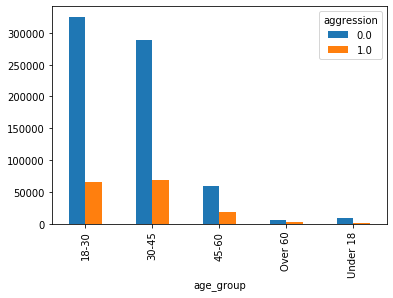

In [70]:
agg_age_grp_ct= pd.crosstab(index= aggression_data['age_group'],columns=aggression_data['aggression'])
agg_age_grp = pd.DataFrame(agg_age_grp_ct)
agg_age_grp.plot.bar()

fig.savefig('Aggression_Age-group_distribution.png')

In [60]:
mean_aggression_score = aggression_data.groupby("worker_id")["aggression_score"].mean()
ag_workr_demo["mean_aggression_score"] = mean_aggression_score
ag_workr_demo.head(5)

,worker_id,gender,english_first_language,age_group,education,mean_aggression_score
0,833,female,0,45-60,bachelors,-0.461388
1,1072,male,0,30-45,bachelors,-0.092138
2,872,male,0,18-30,hs,0.000000
3,2116,male,0,30-45,professional,-0.050242
4,453,male,0,30-45,hs,-0.233405


In [61]:
ag_workr_demo.groupby("age_group").mean_aggression_score.mean()

age_group
18-30      -0.159801
30-45      -0.167509
45-60      -0.160936
Over 60    -0.082218
Under 18   -0.129005
Name: mean_aggression_score, dtype: float64

By Plotting the distribution of average aggression rating among different age groups , we notice that over 60 age group is more biased towards rating comment as aggressive , whereas age group '18-30' seems pretty balanced in the rating spectrum. One thing that needs to be highlighted is small sample size of the other age-groups apart from '18-30' could potentially be introducing bias.

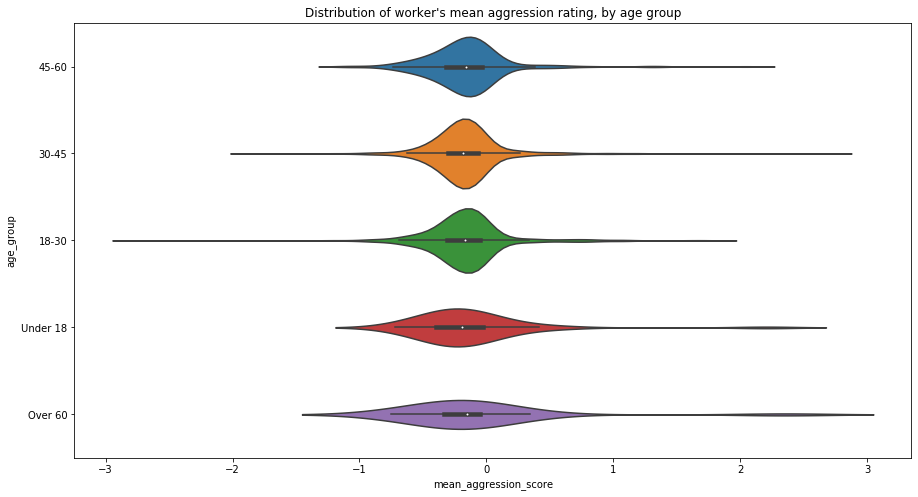

In [71]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title("Distribution of worker's mean aggression rating, by age group")
sns.violinplot( x="mean_aggression_score", y="age_group", data=ag_workr_demo, ax=ax )
fig.savefig('Mean_aggression_rating.png')

### English first language Bias - Analyzing aggression dataset to determine if bias exists in crowdworkers towards rating comments as 'aggressive' if their first language is English

By plotting count of comments rated by crowdworkers according to their first language, we notice that 86% of workers do not have english language as preffered language nad since all the comments are english language, their cpuld potentially be a lot bias introduced due to technical aspects of language and various perspective differences

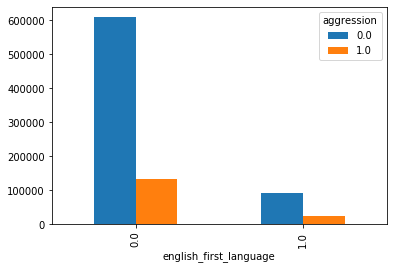

In [72]:
agg_en_ct= pd.crosstab(index= aggresion_data['english_first_language'],columns=aggresion_data['aggression'])

agg_en = pd.DataFrame(agg_en_ct)
agg_en.plot.bar()
fig.savefig('English_first_Language_distribution.png')

In [58]:

Count_en_lang = aggression_data.groupby(['english_first_language']).agg({'english_first_language': ['count']})
Count_en_lang/Count_en_lang.sum()


,english_first_language
,count
english_first_language,
0.0,0.867033
1.0,0.132967


We also notice that workers who do not have english as first language, rated 15% of the comments aggressive, whereas 2% of people who had their first language english, rated comments aggressive.

In [57]:


Count_en_lang = aggression_data.groupby(['english_first_language', 'aggression']).agg({'english_first_language': ['count']})
Count_en_lang/Count_en_lang.sum()


english_first_language
                                                   count
english_first_language aggression                       
0.0                    0.0                      0.711734
                       1.0                      0.155300
1.0                    0.0                      0.105025
                       1.0                      0.027942

In [62]:
ag_workr_demo.groupby("english_first_language").mean_aggression_score.mean()

english_first_language
0   -0.161154
1   -0.163210
Name: mean_aggression_score, dtype: float64

When combining both age group and forst language, we can clearly observe that first language plays a major role in extreme age buckets 'Under 18' and 'Over 60'. The Mean aggression score for these groups are very different on the basis of their first language

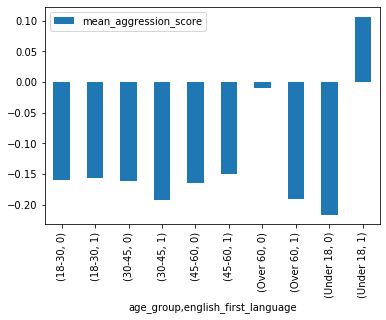

In [73]:
ae = pd.DataFrame(ag_workr_demo.groupby(['age_group','english_first_language']).mean_aggression_score.mean())
ae.plot.bar()
fig.savefig('Mean aggression rating in age-groups for language bucket.png')

### Final Results

<ul>
    <li>Distribution of age-group in aggression dataset suggests that crowdworker age-group was biased towards young age-group as we see 48% of crowdworkers belonging to age-group '18-30' years. This could potentially introduce bias due to theor view in political, gender, age or sexual orientation</li>
    <li>the distribution of average aggression rating among different age groups , we notice that over 60 age group is more biased towards rating comment as aggressive , whereas age group '18-30' seems pretty balanced in the rating spectrum. </li>
    <li>Distribution of comments rated by crowdworkers according to their first language, we notice that 86% of workers do not have english language as preffered language and since all the comments are english language, their could potentially be a lot bias introduced due to technical aspects of language and various perspective differences</li>
    <li>When combining both age group and forst language, we can clearly observe that first language plays a major role in extreme age buckets 'Under 18' and 'Over 60'. The Mean aggression score for these groups are very different on the basis of their first language</li>
    </ul>
    
**The above results clearly point the existence of bias in the data when viewed fom the lense of age-group' as well as 'first language as English'**

## Step 3 - Discuss further Implications

**Which, if any, of these demo applications would you expect the Perspective API—or any model trained on the Wikipedia Talk corpus—to perform well in? Why?** \
Comment Blur filter could perform well on model trained on the Wikipedia Talk as these comments are based on English language and comments being static metric here, the model could perform well. However, with the analysis that I perfomed for age-group and first language, this model can be influenced by bias in age-groups which are in extreme ends of the spectrum such as 'Under 18' and 'Over 60'.


**Which, if any, of these demo applications would you expect the Perspective API to perform poorly in? Why?
What are some other contexts or applications where you would expect the Perspective API to perform particularly well, or particularly poorly? Why?**\
I expect Toxicity timeline application to perform poorly if the model is trained on the Wikipedia talk corpus model. As the analysis suggests that there is a bias in the data towards tagging comments more aggressive in ceratin age groups, over time of the results would become bias towards rating comments more aggressive. Also, I would expect the model to lose accuracy the further we go from the context of a Wikipedia Talk page. The context is decisive, that is, whether it is used inside or outside Wikipedia. It would probably perform better not only within Wikipedia, but also within Talk pages on Wikipedia. The number of editors on Wikipedia is a small percentage of Wikipedia readers and the number of editors who also comment on a Talk page is an even smaller subset of that

**What are some kinds of hostile speech that would be difficult to accurately detect using the approach used to train the Perspective API models?**\
According to the analysis results, topics which are concern older age groups could be difficult to accurately detect as it is shown in the data they majority of crowdworkers belong to younger generation, older age groups are not well represented and hence some topics which might get concerns from these age groups can not be by younger age and hence can get inaccurate aggression score


**What are some potential unintended, negative consequences of using the Perspective API for any of these purposes? In your opinion, are these consequences likely or serious enough that you would recommend that the Perspective API not be used in these applications? Why or why not?** \
Potential bias introduced by the inaccurate sampling of crowdworkers which are not representation of true population can introduce a lot of bias into the system. Skewed annotator population i.e. demographics of crowd-workers might impact rating due to bias in political, gender, age or sexual orientation. Also, Topic biasing in the data - if all examples of a particular topic were rated as toxic by crowd-workers, the trained model will always consider comments related to that topic biased. This type of bias would be especially likely for controversial topics. Moreover the model will not performe well when- 
<ul>
<li>When language is not English -  The dataset is based on English language, hence any model trained on this data cannot be applied to other languages. This is a very big limitation as only less than 5% of the world population has English as their native language.</li>

<li>Identifying the sentiment of the user - As the dataset is customised to identify aggression, the model based on this data may not perform very well in identifying the sentiment of a comment, i.e whether the comment is in favour or against the premises. For example, a sports team may want to identify whether the user commenting on their website is a fan of their team or not. Since fans can be aggressive both while defending or attacking the team, the model based on this data may not be able to make that distinction. </li>

<li>Identifying virality and controversial nature - Many of the NLP models used in media are focussed on identifying the topics which are controversial or have the potential to become viral. This dataset does not have enough depth to support these use cases. </li>
 </ul>
 I believe due to above reasons, I would not recommnd Perspective API be used in these applications


**Imagine you are one of the Google data scientists who maintains the Perspective API. If you wanted to improve the model or the API itself to make it work better for any of these purposes, how should they go about doing that?**/

To use the model effectively in a different context would require retraining on data from that context.
The researchers claim that the model would transfer to other contexts without retraining.

Language is flexible and idiosyncratic. The way that Wikipedia editors verbally aggress is probably different than the way that a random user on Twitter would. By different, I mean the words that they would use, the idioms, and the writing style. The reason is that the Wikipedia-editor demographic is probably quite different from the Twitter-user demographic. Also, the Talk page of a Wikipedia article provides different degrees of freedom when it comes to expression than a Tweet. For example, a Tweet is (by design) 280 characters, whereas on a Talk page an editor could really take as much space as they want. Including data from different platforms would increase the accuracy. 
